<a href="https://colab.research.google.com/github/dgoppenheimer/Molecular-Dynamics/blob/main/Plotly_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# see if plotly is already installed in colab
import plotly
plotly.__version__

'5.5.0'

Yes, plotly is already installed.

See [IV_Plotly](https://colab.research.google.com/github/pytrain/iViz/blob/master/IV_Plotly.ipynb#scrollTo=2ljXzS-h9Gym) for most of the code, below.

In [4]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure()

config = dict({'scrollZoom': True})

fig.add_trace(
    go.Scatter(
        x=[1, 2, 3],
        y=[1, 3, 1]))

fig.show(config=config)

Note the nice scrolling feature on the graph. Sweet!

Let's update the figure with a legend.

In [8]:
fig = go.Figure()

config = dict({'scrollZoom': True})

fig.add_trace(
    go.Scatter(
        x=[1, 2, 3],
        y=[1, 3, 1]))

fig.update_layout(
    title='simple line example',
    showlegend=True
)

fig.show(config=config)

In [9]:
import plotly.express as px
import numpy as np

t = np.linspace(0, 2*np.pi, 100)

fig = px.line(x=t, y=np.cos(t), labels={'x':'t', 'y':'cos(t)'})
fig.show()

In [10]:
import plotly.express as px
iris = px.data.iris()
fig = px.scatter(iris, x="sepal_width", y="sepal_length", color="species", marginal_y="violin",
           marginal_x="box", trendline="ols")
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## Box Plots

See the Plotly help page on [Box Plots in Python](https://plotly.com/python/box-plots/)

In [11]:
import plotly.express as px
df = px.data.tips()
fig = px.box(df, y="total_bill")
fig.show()

If a column name is given as `x` argument, a box plot is drawn for each value of `x`.

In [12]:
import plotly.express as px # import plotly
df = px.data.tips() # here is the data file
fig = px.box(df, x="time", y="total_bill") # px.box indicates a box plot, x and y are data
fig.show() # show the plot

Scroll over the graph to see interactive information.

Let's look at the underlying data as a table.

In [67]:
import plotly.graph_objects as go
import pandas as pd

import plotly.express as px

df = px.data.tips()

fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=df.values.T,
               fill_color='lavender',
               align='left'))
])

fig.show()

Wow, this took way to long, a bunch of googling, and a lot of trying random text to get plotly to show what is in one of its own tables.

Let's try that again with a file I uploaded.

In [58]:
import plotly.graph_objects as go
import pandas as pd

import plotly.express as px

df = pd.read_csv('/content/rmsd-core.dat',
           sep='\s\s+', engine='python'),
# fig = go.Figure(data=[go.Table(
#     header=dict(values=list(df.columns),
#                 fill_color='paleturquoise',
#                 align='left'),
#     cells=dict(values=df.values.T,
              
#                fill_color='lavender',
#                align='left'))
# ])

df

(    frame   mol0
 0       0    NaN
 1       1  0.405
 2       2  0.507
 3       3  0.606
 4       4  0.657
 ..    ...    ...
 93     93  1.914
 94     94  1.898
 95     95  1.951
 96     96  1.953
 97     97  1.932
 
 [98 rows x 2 columns],)

Okay, that took a bit of googling. Try again to show table.

Here is some useful information:

- `df.index` returns the list of the index, in our case, it’s just integers 0, 1, 2, …, 97.
- `df.columns` gives the list of the column (header) names.


In [81]:
import plotly.graph_objects as go
import pandas as pd

import plotly.express as px

df = pd.read_csv('/content/rmsd-core.dat',
           sep='\s\s+', engine='python')
           
df.columns

Index(['frame', 'mol0'], dtype='object')

In [79]:
df.index

RangeIndex(start=0, stop=98, step=1)

In [82]:
df.mol0 # gets the data in the specified column
# this wont work if the column has a space in it

0       NaN
1     0.405
2     0.507
3     0.606
4     0.657
      ...  
93    1.914
94    1.898
95    1.951
96    1.953
97    1.932
Name: mol0, Length: 98, dtype: float64

See [this site](https://pythoninoffice.com/get-values-rows-and-columns-in-pandas-dataframe/)

```
dataframe['column name']
```
dataframe = df
use double square brackets for multiple columns

```
dataframe[ ['column name 1', 'column name 2', 'column name 3', ... ] ]
```

`df.loc[row, column]`. column is optional, and if left blank, we can get the entire row. 

### pandas get cell values

just query based on column and row




In [110]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

df = pd.read_csv('/content/rmsd-core.dat',
           sep='\s\s+', engine='python')

fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='center'),
    cells=dict(values=[df.frame, df.mol0],
                fill_color='lavender',
                align='left'))
])
fig.update_layout(width=500)
fig.show()

This took a long time to get right. Commas and parentheses are crucial.

## Named Colors

Here is some code I got from the [List of named colors](https://matplotlib.org/stable/gallery/color/named_colors.html) page from the [Matplotlib documentation website](https://matplotlib.org/stable/index.html).

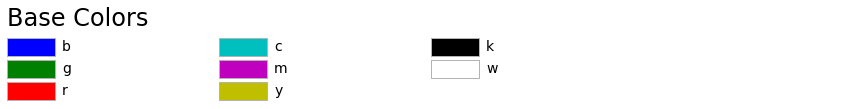

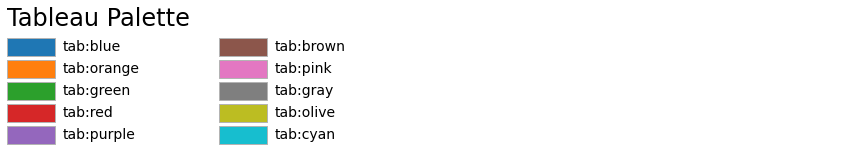

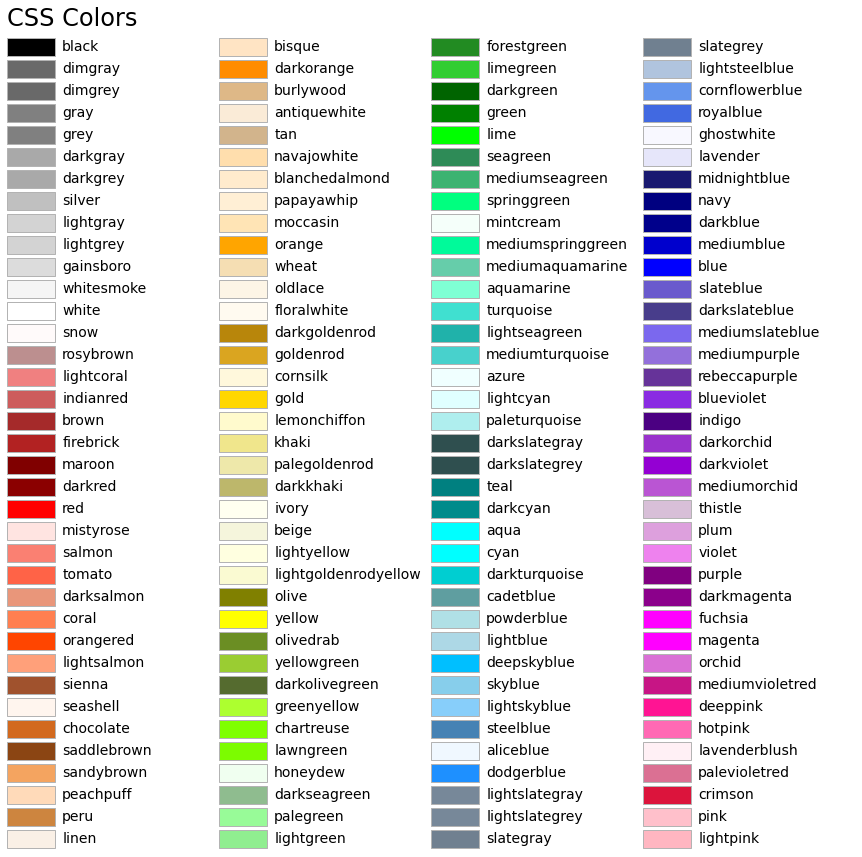

In [112]:
#@title Named Colors Code

"""
====================
List of named colors
====================

This plots a list of the named colors supported in matplotlib. Note that
:ref:`xkcd colors <xkcd-colors>` are supported as well, but are not listed here
for brevity.

For more information on colors in matplotlib see

* the :doc:`/tutorials/colors/colors` tutorial;
* the `matplotlib.colors` API;
* the :doc:`/gallery/color/color_demo`.
"""

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=False, emptycols=1)
plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
                sort_colors=False, emptycols=2)

# sphinx_gallery_thumbnail_number = 3
plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

# Optionally plot the XKCD colors (Caution: will produce large figure)
# xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
# xkcd_fig.savefig("XKCD_Colors.png")

plt.show()


#############################################################################
#
# .. admonition:: References
#
#    The use of the following functions, methods, classes and modules is shown
#    in this example:
#
#    - `matplotlib.colors`
#    - `matplotlib.colors.rgb_to_hsv`
#    - `matplotlib.colors.to_rgba`
#    - `matplotlib.figure.Figure.get_size_inches`
#    - `matplotlib.figure.Figure.subplots_adjust`
#    - `matplotlib.axes.Axes.text`
#    - `matplotlib.patches.Rectangle`


## Line charts

This time I'll try to reproduce the chart made by VMD.

In [124]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

df = pd.read_csv('/content/rmsd-core.dat', sep='\s\s+', engine='python')

fig = px.line(df, x="frame", y="mol0", title='RMSD of CORE',
labels=dict(frame="simulation frame", mol0="RMSD vs t=0")
)
fig.update_layout(width=600)
fig.show()

Okay, that worked. Just a few missing commas at first, but I quickly recovered. I should really learn basic python syntax.

Let's try the *LID* domain. Upload `rmsd-lid.dat`, and look at the table.

In [2]:
import plotly.graph_objects as go
import pandas as pd

import plotly.express as px

df = pd.read_csv('/content/rmsd-lid.dat',
           sep='\s\s+', engine='python')
           
df.columns

Index(['frame', 'mol0'], dtype='object')

In [4]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

df = pd.read_csv('/content/rmsd-lid.dat',
           sep='\s\s+', engine='python')

fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='center'),
    cells=dict(values=[df.frame, df.mol0],
                fill_color='lavender',
                align='left'))
])
fig.update_layout(width=500)
fig.show()

Nice. Let's plot some lines.

In [9]:
df = pd.read_csv('/content/rmsd-lid.dat', sep='\s\s+', engine='python')

fig = px.line(df, x="frame", y="mol0", title='RMSD of LID Domain',
labels=dict(frame="simulation frame", mol0="RMSD vs t=0")
)
fig.update_layout(width=600)
fig.show()

Upload `rmsd-nmp.dat`, and look at the table.

Nice. Okay, let's try the last domain--the *NMP* domain.

In [6]:
import plotly.graph_objects as go
import pandas as pd

import plotly.express as px

df = pd.read_csv('/content/rmsd-lid.dat',
           sep='\s\s+', engine='python')
           
df.columns

Index(['frame', 'mol0'], dtype='object')

In [7]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

df = pd.read_csv('/content/rmsd-nmp.dat',
           sep='\s\s+', engine='python')

fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='center'),
    cells=dict(values=[df.frame, df.mol0],
                fill_color='lavender',
                align='left'))
])
fig.update_layout(width=500)
fig.show()

In [8]:
df = pd.read_csv('/content/rmsd-nmp.dat', sep='\s\s+', engine='python')

fig = px.line(df, x="frame", y="mol0", title='RMSD of NMP Domain',
labels=dict(frame="simulation frame", mol0="RMSD vs t=0")
)
fig.update_layout(width=600)
fig.show()

Looking good!

It would be useful to see all traces on the same figure. Let's give it a whirl.

In [20]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from pathlib import Path

fig = go.Figure()
for f in files: 
    file_name = f.stem  
    df = pd.read_csv(f, dtype={'Pass Percentage': int, 'original_pass_percent': 
         int})  
    print(df.head())  
    
    fig.add_trace(go.Scatter(x=df['frame'], y=['mol0'],
                mode='lines',
                name=file_name))



fig = px.line(df)


### Generate the plot
fig.show()





In [ ]:
px.line(df, x='frame', y='mol0', color='filename')

plt.show()  # outside the loop

In [28]:
from pathlib import Path
import pandas as pd
import numpy as np
import plotly.express as px

# location where files exist
p = Path.cwd().joinpath("SO_csv")
if not p.is_dir():
    p.mkdir()
# generate 100s of files
for i in range(400):
    pd.DataFrame(
        {
            "time": pd.date_range("00:00", freq="30min", periods=47),
            "v(t)": pd.Series(np.random.uniform(1, 5, 47)).sort_values(),
        }
    ).to_csv(p.joinpath(f"GIRS12_L_8V_0.95bar.{i}"), index=False)

# read and concat all the CSVs into one dataframe, creating additional column that is the filename
# scatter this dataframe, a scatter / color per CSV
px.scatter(
    pd.concat(
        [pd.read_csv(f).assign(name=f.name) for f in p.glob("GIRS12_L_8V_0.95bar.*")]
    ),
    x="time",
    y="v(t)",
    color="name",
)

The `.dat` files are causing the problem. I don't know why VMD saves the data as `.dat`. files, but let's change them to `.csv`. I'm hoping my problems will go away.

In [58]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

df = pd.read_csv('/content/rmsd-nmp.dat',
           sep='\s\s+', engine='python')

df.to_csv('/content/rmsd-nmp.csv', index = False, sep = ",")

data= pd.read_csv("/content/rmsd-nmp.csv")
data

,frame,mol0
0,0,NaN
1,1,0.353
2,2,0.494
3,3,0.589
4,4,0.612
...,...,...
93,93,1.814
94,94,1.785
95,95,1.761
96,96,1.799


Let's make some more `.csv` files.

In [59]:
df = pd.read_csv('/content/rmsd-core.dat',
           sep='\s\s+', engine='python')
df.to_csv('/content/rmsd-core.csv', index = False, sep = ",")

In [60]:
df = pd.read_csv('/content/rmsd-lid.dat',
           sep='\s\s+', engine='python')
df.to_csv('/content/rmsd-lid.csv', index = False, sep = ",")

Now let's try to put all the data in the same figure.

In [70]:
import plotly.express as px
import plotly.graph_objects as go
df = pd.read_csv('/content/rmsd-nmp.csv')
df2 = pd.read_csv('/content/rmsd-core.csv')

# since I'm just reading the files into different dataframes,
# I don't need to make csv files 

fig1 = px.line(df, x="frame", y="mol0")
fig1.update_traces(line=dict(color = 'rgba(50,50,50,0.2)'))

fig2 = px.line(df2, x="frame", y="mol0")
fig1.update_traces(line=dict(color = 'red'))

fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.show()

In [101]:
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv('/content/rmsd-core.dat', sep='\s\s+', engine='python')
df2 = pd.read_csv('/content/rmsd-lid.dat', sep='\s\s+', engine='python')
df3 = pd.read_csv('/content/rmsd-nmp.dat', sep='\s\s+', engine='python')

fig1 = px.line(df, x="frame", y="mol0")
fig1.update_traces(line=dict(color = 'violet'))

fig2 = px.line(df2, x="frame", y="mol0")
fig2.update_traces(line=dict(color = 'deepskyblue'))

fig3 = px.line(df3, x="frame", y="mol0")
fig3.update_traces(line=dict(color = 'goldenrod'))

fig4 = go.Figure(data=fig1.data + fig2.data + fig3.data)

fig4.update_layout(width=600)
fig4.update_layout(legend=dict(
        x=0,
        y=1,
        title="Negative"))
fig4.show()

# fig.add_trace(
#         px.line(
#             subset,
#             x=subset['time'],
#             y=subset['water_m'],
#             color=subset['ID'],
#             title=subset_id
#         )

In [112]:
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path
import pandas as pd
import numpy as np


# location where files exist
p = Path.cwd().joinpath("/content/")

# generate 100s of files
# for i in range(3):
#     pd.DataFrame().to_csv(p.joinpath(f"rmsd-*.csv{i}"), index=False)

# read and concat all the CSVs into one dataframe, creating additional column that is the filename
# scatter this dataframe, a scatter / color per CSV
fig5 = px.line(
    pd.concat(
        [pd.read_csv(f).assign(name=f.name) for f in p.glob("rmsd-*.csv")]
    ),
    x="frame",
    y="mol0",
    color="name",
)

# to anchor the legend in the top, left of the graph:

# fig5.update_layout(width=600, title_text="RMSD for adk",
#                    legend=dict(
#     yanchor="top",
#     y=0.99,
#     xanchor="left",
#     x=0.01
# ))

